In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel("Desktop\PGP-DSE Data\Machine Learning\Flight Fare Prediction Datset\Data_Train.xlsx")
pd.set_option('display.max_columns',None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.shape

(10683, 11)

In [4]:
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [5]:
train_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

In [9]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [10]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Since we have extracted Day & Month of Journey, now we can drop "Date_of_Journey" column from our dataset
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
# Departure Time is when plane takes-off from one airport
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [14]:
# Since we have extracted Hour & Minute, now we can drop "Dep_Time" column from our dataset
train_data.drop('Dep_Time',axis=1,inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
# Arrival Time is when planes lands to the destination airport
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# From above we will be able to extract Hour & Minute, now we can drop "Arrival_Time" from our dataset
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
# Extracting Hour & Min from "Duration" column
lx1 = list(train_data['Duration'])
lx2 = []
lx3 = []
for i in lx1:
    if 'h' in i and 'm' in i:
        lx2.append(int(i.split('h')[0].strip(" ")))
        lx3.append(int((i.split('m')[0]).split("h")[1].strip(" ")))
    elif 'h' in i and 'm' not in i:
        lx2.append(int(i.split('h')[0].strip(" ")))
        lx3.append(0)
    elif 'm' in i and 'h' not in i:
        lx2.append(0)
        lx3.append(int(i.split('m')[0].strip(" ")))
train_data['Duration_hour'] = lx2
train_data['Duration_min'] = lx3
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
# As Hour & Min has been extracted, now we can delete "Duration" column from our dataset
train_data.drop('Duration',axis=1,inplace=True)

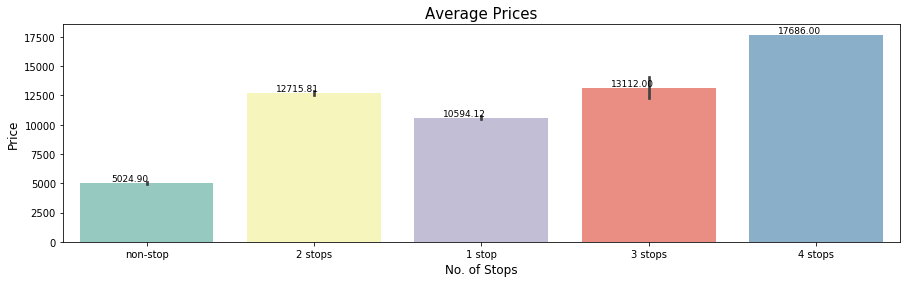

In [31]:
# Now, let's try to analyze "Total_Stops" column
plt.figure(figsize=(15,4))
graph = sns.barplot(x='Total_Stops',y='Price',data=train_data,palette="Set3")
plt.title("Average Prices",fontsize=15)
plt.xlabel("No. of Stops",fontsize=12)
plt.ylabel("Price",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black',fontsize=9)

In [32]:
# As we can clearly see that Avergae Prices with Number of Stoppages is increasing, so we would not be wrong if we consider
# this column data as Ordinal Data rather than Nominal Data.
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [43]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [44]:
# Almost 80% of the data in "Additional_Info" column is labelled as "No Info", it would not give us any good results, we
# will remove this column from our dataset.
train_data.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [45]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [47]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [48]:
Airline = pd.get_dummies(train_data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [49]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [51]:
Source = pd.get_dummies(train_data['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [53]:
Destination = pd.get_dummies(train_data['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
df_train = pd.concat([train_data,Airline,Source,Destination],axis=1)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
df_train.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
df_train.shape

(10682, 30)

----------------------------------------------------------------------------------------------------------------------------

# Test Set

In [68]:
test_data = pd.read_excel(r"Desktop\PGP-DSE Data\Machine Learning\Flight Fare Prediction Datset\Test_Set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [69]:
# Dropping Null Values
test_data.dropna(inplace=True)

# One-Hot Encoding for Airline column
Airline = pd.get_dummies(test_data['Airline'],drop_first=True)

# One-Hot Encoding for Source column
Source = pd.get_dummies(test_data['Source'],drop_first=True)

# One-Hot Encoding for Destination column
Destination = pd.get_dummies(test_data['Destination'],drop_first=True)

# Transforming Total_Stops column
test_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

# Fetching Journey_day & Journey_month from Date_of_Journey column
test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month

# Fetching Dep_hour & Dep_min from Dep_Time column
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

# Fetching Arrival_hour & Arrival_min from Arrival_Time column
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

# Fetching Duration_hour & Duration_min from Duration column
lx1 = list(test_data['Duration'])
lx2 = []
lx3 = []
for i in lx1:
    if 'h' in i and 'm' in i:
        lx2.append(int(i.split('h')[0].strip(" ")))
        lx3.append(int((i.split('m')[0]).split("h")[1].strip(" ")))
    elif 'h' in i and 'm' not in i:
        lx2.append(int(i.split('h')[0].strip(" ")))
        lx3.append(0)
    elif 'm' in i and 'h' not in i:
        lx2.append(0)
        lx3.append(int(i.split('m')[0].strip(" ")))
test_data['Duration_hour'] = lx2
test_data['Duration_min'] = lx3

# Dropping those columns from which data has been fetched
test_data.drop(columns=['Airline','Source','Destination','Date_of_Journey','Dep_Time','Arrival_Time','Duration',],axis=1,inplace=True)

# Dropping those columns which aren't necessary
test_data.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [70]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,1,6,6,17,30,4,25,10,55
1,1,12,5,6,20,10,20,4,0
2,1,21,5,19,15,19,0,23,45
3,1,21,5,8,0,21,0,13,0
4,0,24,6,23,55,2,45,2,50


In [71]:
df_test = pd.concat([test_data,Airline,Source,Destination],axis=1)
df_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [72]:
df_test.shape

(2671, 28)

# Feature Selection

Feature Selection is a technique which is used to identify how good a feature is in predicting target variable, there are
several techniques to implement it, few are mentioned below which we will be using in our project:-
1. heatmap
2. feature_importances_
3. SelectKBest

In [73]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [74]:
X = df_train.drop('Price',axis=1)
y = df_train['Price']

Implementing heatmap

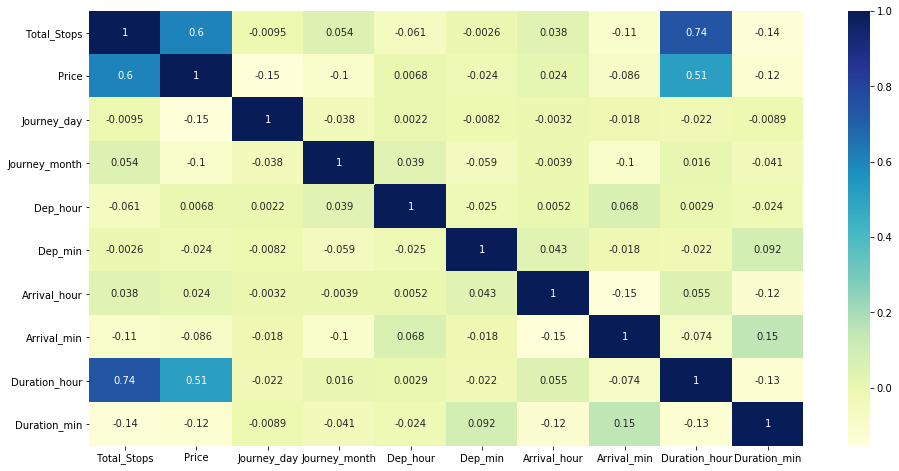

In [82]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

Implementing  feature_importances_ using ExtraTreesRegressor

In [83]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor().fit(X,y)
model.feature_importances_

array([1.90404299e-01, 1.47056331e-01, 5.08199351e-02, 2.42359483e-02,
       1.93327295e-02, 2.65435046e-02, 1.93348688e-02, 1.41004989e-01,
       1.99178401e-02, 1.32189377e-02, 2.24026806e-03, 2.18696223e-02,
       1.45069106e-01, 6.60012787e-02, 1.83011471e-02, 8.70864899e-04,
       4.98742944e-03, 1.13566439e-04, 4.58366657e-03, 1.08584406e-04,
       5.44573448e-04, 9.12806015e-03, 3.69157743e-03, 7.48012397e-03,
       1.72143739e-02, 1.63537696e-02, 4.52557018e-03, 5.95456160e-04,
       2.44515777e-02])

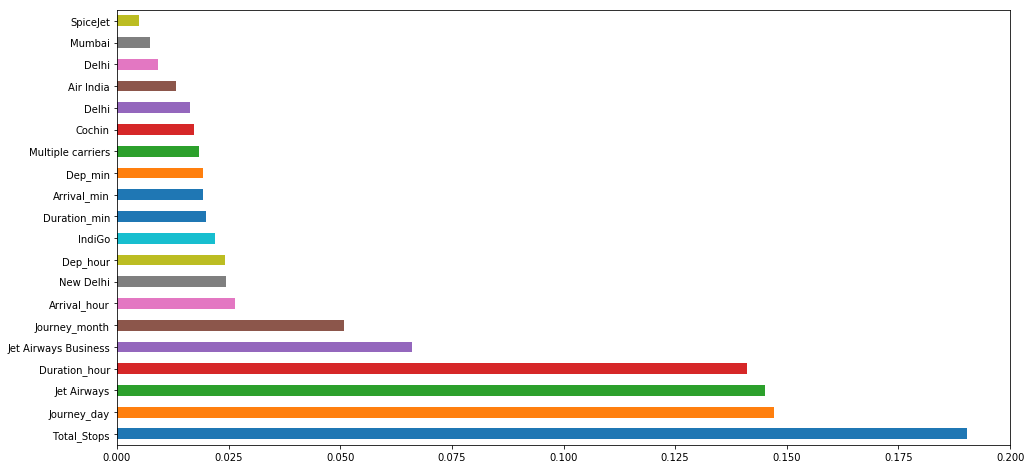

In [84]:
plt.figure(figsize=(16,8))
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Implementing Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor().fit(X_train,y_train)
prediction1 = model1.predict(X_test)
print("Training Score",model1.score(X_train,y_train))
print("Validation Score",model1.score(X_test,y_test))
print()
print()
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE:-",mean_absolute_error(y_test,prediction1))
print("MSE:-",mean_squared_error(y_test,prediction1))
print("RMSE:-",np.sqrt(mean_squared_error(y_test,prediction1)))

Training Score 0.9464979888014664
Validation Score 0.7911744895379217


MAE:- 1213.7665717033965
MSE:- 4502707.418505169
RMSE:- 2121.958392265308


Text(0.5,1,'Homoskedasticity Check')

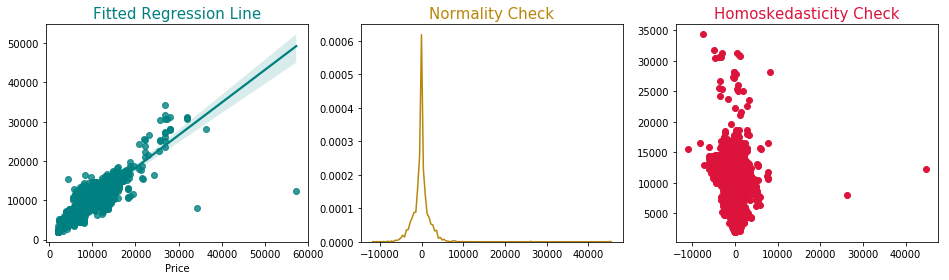

In [125]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=prediction1,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(prediction1)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),prediction1,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Hyperparameter Tuning

Hyperparameter Tuning Techniques:
1. RandomizedSearchCV --> Fast
2. GridSearchCV

In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in Random Forest
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(5,30,num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [131]:
# Creating the Random Grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [132]:
rf = RandomizedSearchCV(estimator=model1,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [133]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [135]:
# Best Hyperparameter generated using RandomizedSearchCV
rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [139]:
# Using the above best selected features for training our model and predicting results
from sklearn.metrics import r2_score
prediction3 = rf.predict(X_test)
print("Validation Score",r2_score(y_test,prediction3))
print()
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE:-",mean_absolute_error(y_test,prediction3))
print("MSE:-",mean_squared_error(y_test,prediction3))
print("RMSE:-",np.sqrt(mean_squared_error(y_test,prediction3)))

Validation Score 0.8124387459365017

MAE:- 1165.2053271674663
MSE:- 4044206.3243475696
RMSE:- 2011.0212142957541


Text(0.5,1,'Homoskedasticity Check')

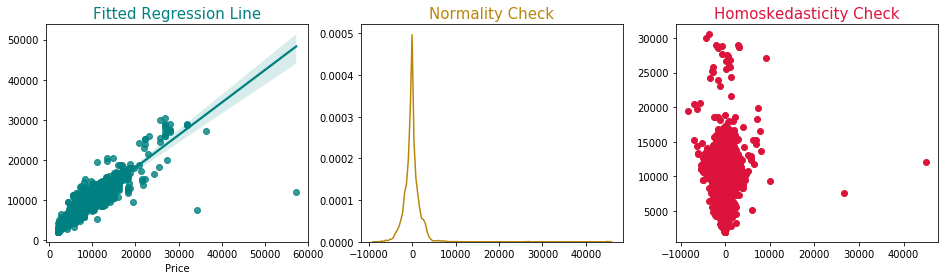

In [140]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=prediction3,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(prediction3)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),prediction3,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing Gradient Boosting Regressor

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(learning_rate=0.5).fit(X_train,y_train)
prediction2 = model2.predict(X_test)
print("Training Score",model2.score(X_train,y_train))
print("Validation Score",model2.score(X_test,y_test))
print()
print()
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE:-",mean_absolute_error(y_test,prediction2))
print("MSE:-",mean_squared_error(y_test,prediction2))
print("RMSE:-",np.sqrt(mean_squared_error(y_test,prediction2)))

Training Score 0.8548369938679171
Validation Score 0.8317419707031072


MAE:- 1313.0172739418363
MSE:- 3627989.104692063
RMSE:- 1904.728092062503


Text(0.5,1,'Homoskedasticity Check')

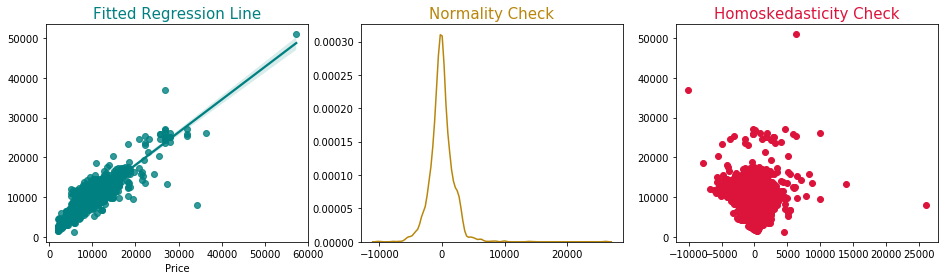

In [153]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=prediction2,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(prediction2)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),prediction2,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Hyperparameter Tuning

Hyperparameter Tuning Techniques:-
1. RandomizedSearchCV
2. GridSearchCV

In [154]:
from sklearn.model_selection import RandomizedSearchCV

# Learning rate of the model
learning_rate = [0.4,0.45,0.5,0.55,0.6]

# Number of trees in Random Forest
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(5,30,num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [156]:
# Creating the Random Grid
random_grid = {'n_estimators':n_estimators,
               'learning_rate':learning_rate,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [157]:
gb = RandomizedSearchCV(estimator=model2,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [158]:
gb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5, total= 1.9min
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5, total= 1.8min
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5, total= 1.6min
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5, total= 1.6min
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, learning_rate=0.5, total= 1.8min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, learning_rate=0.4 
[CV] 

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.55, total=  30.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, learning_rate=0.45 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, learning_rate=0.45, total=  16.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, learning_rate=0.45 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, learning_rate=0.45, total=  16.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, learning_rate=0.45 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, learning_rate=0.45, total=  17.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, lea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': [0.4, 0.45, 0.5, 0.55, 0.6], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='ne

In [160]:
gb.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.4}

In [167]:
prediction4 = gb.predict(X_test)
print("Validation Score",r2_score(y_test,prediction4))
print()
print()
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE:-",mean_absolute_error(y_test,prediction4))
print("MSE:-",mean_squared_error(y_test,prediction4))
print("RMSE:-",np.sqrt(mean_squared_error(y_test,prediction4)))

Validation Score 0.8222384212403699


MAE:- 1233.0499084109792
MSE:- 3832905.173487065
RMSE:- 1957.7806755321355


Text(0.5,1,'Homoskedasticity Check')

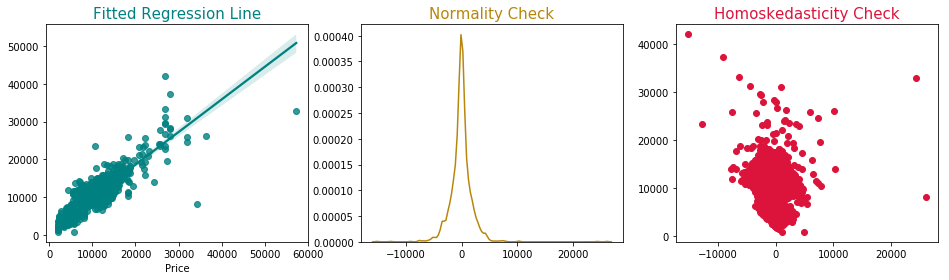

In [168]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=prediction4,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(prediction4)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),prediction4,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')